In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import drive

In [44]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [0]:
df = pd.read_excel("Master_1068_18Apr.xlsx")

In [47]:
df.head()

,SID,NAME,ISO,YEAR_MIN,BASIN,SUBBASIN,SUBBASIN EDITED,NATURE,TRACK_TYPE,ISO_TIME,COORDS,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,USA_SSHS EDITED,WIND_CALC_MEAN (v_land_kn to be used),PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,34KN_POP,34KN_ASSETS,64KN_POP,64KN_ASSETS,96KN_POP,96KN_ASSETS,CPI,TOTAL_DAMAGE_(000$),Total Affected]
0,1949163N07145,DELLA,JPN,1949,WP,WP,NaN,TS,main,"['1949-06-21 03:00:00', '1949-06-22 03:00:00',...","[[35.67, 130.99], [38.35, 135.07], [38.82, 136...",0,0,0,0,NaN,39.133333,1000.333333,19.0,91.444444,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,194046
1,1950241N23140,JANE,JPN,1950,WP,WP,NaN,ET,main,"['1950-09-02 18:00:00', '1950-09-03 12:00:00',...","[[31.71, 134.12], [38.48, 137.98], [46.7, 152.8]]",6,0,6,-1,NaN,76.400000,974.833333,23.0,37.666667,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,642117
2,1951224N12316,CHARLIE,JAM,1951,NAm,NAm,NaN,TS,main,"['1951-08-17 21:00:00', '1951-08-18 12:00:00']","[[17.34, -75.41], [18.3, -79.4]]",15,0,15,1,NaN,88.500000,974.500000,15.5,283.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,10.175534,56000.0,20200
3,1951337N09150,AMY,PHL,1951,WP,WP,NaN,TS,main,"['1951-12-08 18:00:00', '1951-12-08 21:00:00',...","[[11.52, 127.35], [11.34, 127.09], [11.17, 126...",15,0,15,2,NaN,84.488235,979.549020,3.0,161.647059,119.200,20464826.0,1.880275e+11,12675908.0,1.131051e+11,5618193.0,4.897333e+10,10.175534,NaN,60000
4,1952180N05144,EMMA,PHL,1952,WP,WP,NaN,TS,main,"['1952-07-01 18:00:00', '1952-07-01 21:00:00',...","[[9.57, 127.79], [9.63, 127.19], [12.38, 119.4...",3,2,1,1,NaN,83.920000,980.600000,10.8,291.400000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,103


In [48]:
df.apply(lambda x: x.isnull().sum(),axis = 0)

SID                                         0
NAME                                        0
ISO                                         0
YEAR_MIN                                    0
BASIN                                       0
SUBBASIN                                    0
SUBBASIN EDITED                          1057
NATURE                                      0
TRACK_TYPE                                  0
ISO_TIME                                    0
COORDS                                      0
TOTAL_HRS                                   0
DAY_HRS                                     0
NIGHT_HRS                                   0
USA_SSHS                                    0
USA_SSHS EDITED                          1060
WIND_CALC_MEAN (v_land_kn to be used)       3
PRES_CALC_MEAN                              0
STORM_SPD_MEAN                              0
STORM_DR_MEAN                               0
V_LAND_KN                                   0
34KN_POP                          

In [0]:
df1 = df[["NAME","ISO","YEAR_MIN","BASIN","TOTAL_HRS","WIND_CALC_MEAN (v_land_kn to be used)","PRES_CALC_MEAN","STORM_SPD_MEAN","34KN_POP","64KN_POP","Total Affected]"]]

In [50]:
#Dropping nan values
df1.dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
# Checking how many unique values are there in basin so we can change its categorical value in numeric 
df1["BASIN"].unique()

array(['NAm', 'WP', 'EP', 'SP', 'SI', 'NI'], dtype=object)

In [52]:
# Changed Basin Categorical value in numeric
basin = {"WP": 0 ,"NAm": 1,"SP": 2,"EP": 3,"SI": 4,"NI":5}
df1["BASIN"] = df1["BASIN"].apply(lambda x : basin[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df1

,NAME,ISO,YEAR_MIN,BASIN,TOTAL_HRS,WIND_CALC_MEAN (v_land_kn to be used),PRES_CALC_MEAN,STORM_SPD_MEAN,34KN_POP,64KN_POP,Total Affected]
2,CHARLIE,JAM,1951,1,15,88.500000,974.500000,15.500000,2788659.0,2788659.0,20200
3,AMY,PHL,1951,0,15,84.488235,979.549020,3.000000,20464826.0,12675908.0,60000
5,TRIX,PHL,1952,0,21,106.900000,955.208333,9.625000,43820633.0,15600481.0,349
6,WILMA,PHL,1952,0,12,112.800000,947.500000,15.000000,28281376.0,7957281.0,349
7,HAZEL,HTI,1954,1,6,105.000000,976.666667,5.333333,10396164.0,3570247.0,250000
...,...,...,...,...,...,...,...,...,...,...,...
1063,FIFI:ORLENE,HND,1974,1,21,91.769231,974.083333,9.384615,4100169.0,1756946.0,600000
1064,BRENDAN,KOR,1985,0,12,52.000000,986.222222,21.500000,658451.0,0.0,20
1065,JOAN:MIRIAM,COL,1988,1,12,75.312500,982.187500,8.250000,5858927.0,0.0,100000
1066,JOAN:MIRIAM,NIC,1988,3,21,86.500000,965.214286,8.571429,5840738.0,780553.0,360278


In [0]:
#divide dataset into training and test
x_train = df1.iloc[0:700,3:10]
y_train = df1.iloc[0:700,10:]
x_test = df1.iloc[700: ,3:10]
y_test = df1.iloc[700: ,10:]

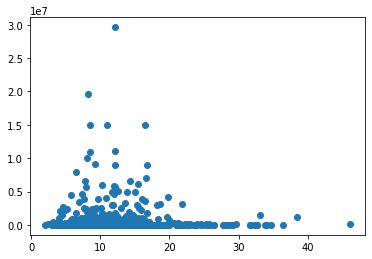

In [55]:
# First visualizing relation of Storm Speed Mean with Total Affected
X = x_train[["STORM_SPD_MEAN"]]
plt.scatter(X["STORM_SPD_MEAN"],y_train)
plt.show()

In [0]:
# Gaussian Mixture Model n_component is 5 so it will make 5 clusters
gmm = GMM(n_components=5)

In [57]:
gmm.fit(X,y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
y_pred = gmm.predict(X)

In [59]:
# As we can see GMM divided total affected in 5 clusters 
y_pred

array([0, 2, 4, 0, 2, 4, 4, 1, 2, 4, 2, 4, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1,
       0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 4, 2, 0, 4, 4, 4, 4, 2, 2, 0, 2,
       4, 4, 4, 0, 2, 0, 4, 0, 4, 0, 4, 4, 0, 2, 4, 0, 3, 4, 4, 2, 0, 2,
       0, 0, 4, 3, 0, 4, 2, 4, 4, 2, 4, 4, 4, 0, 4, 0, 4, 2, 3, 2, 0, 0,
       4, 4, 0, 2, 4, 0, 4, 2, 0, 0, 0, 4, 3, 3, 0, 4, 4, 0, 1, 4, 0, 0,
       4, 0, 4, 2, 2, 4, 3, 2, 0, 1, 0, 1, 4, 2, 4, 4, 4, 1, 4, 2, 3, 3,
       4, 2, 2, 4, 4, 0, 2, 0, 0, 3, 4, 3, 0, 4, 1, 3, 4, 4, 0, 4, 0, 0,
       2, 4, 2, 4, 2, 0, 4, 4, 0, 4, 0, 4, 1, 0, 2, 4, 3, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 4, 0, 4, 0, 4, 4, 3, 4, 4, 0, 2, 4, 0, 4,
       2, 1, 4, 0, 4, 2, 3, 0, 0, 2, 2, 2, 4, 0, 4, 0, 0, 0, 3, 4, 0, 0,
       2, 4, 0, 4, 0, 0, 4, 4, 4, 4, 3, 1, 2, 4, 2, 4, 2, 3, 4, 0, 0, 0,
       0, 3, 1, 2, 2, 0, 2, 4, 4, 0, 0, 2, 0, 4, 3, 4, 0, 3, 0, 2, 4, 4,
       0, 4, 0, 4, 4, 2, 2, 4, 4, 0, 3, 2, 3, 3, 0, 4, 3, 4, 0, 0, 4, 4,
       3, 4, 4, 4, 4, 3, 4, 3, 0, 4, 4, 2, 3, 2, 3,

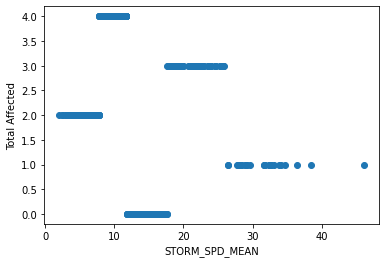

In [60]:
# 2-D visualization of clusters
plt.scatter(X,y_pred)
plt.xlabel("STORM_SPD_MEAN")
plt.ylabel("Total Affected")
plt.show()

In [0]:
# Using GMM for prediction on test dataset
pred1 = gmm.predict(x_test[["STORM_SPD_MEAN"]])

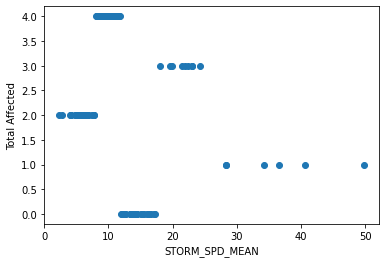

In [62]:
# 2D visualization of clusters on test dataset. AND WE CAN SEE IT'S NOT DOING MUCH WELL BECAUSE CLUSTERING ALGOS ARE NOT GOOD FOR PREDICTION.
plt.scatter(x_test[["STORM_SPD_MEAN"]],pred1)
plt.xlabel("STORM_SPD_MEAN")
plt.ylabel("Total Affected")
plt.show()

In [0]:
# ABOVE SAME PROCESS IS DOING FOR PRES_CALC_MEAN AND TOTAL AFFECTED
pred2 = gmm.fit(x_train[["PRES_CALC_MEAN"]],y_train).predict(x_train[["PRES_CALC_MEAN"]])

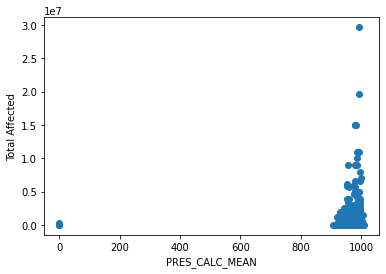

In [64]:
plt.scatter(x_train[["PRES_CALC_MEAN"]],y_train)
plt.xlabel("PRES_CALC_MEAN")
plt.ylabel("Total Affected")
plt.show()

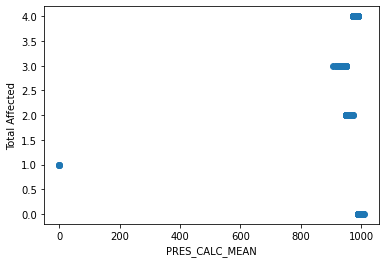

In [65]:
plt.scatter(x_train[["PRES_CALC_MEAN"]],pred2)
plt.xlabel("PRES_CALC_MEAN")
plt.ylabel("Total Affected")
plt.show()

In [0]:
pred3 = gmm.predict(x_test[["PRES_CALC_MEAN"]])

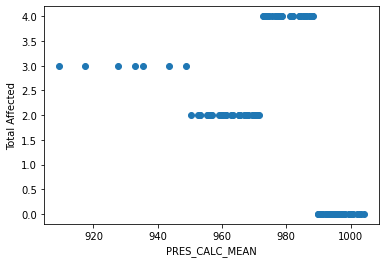

In [67]:
plt.scatter(x_test[["PRES_CALC_MEAN"]],pred3)
plt.xlabel("PRES_CALC_MEAN")
plt.ylabel("Total Affected")
plt.show()